# Lead Scoring - Case Study


**Problem Statement:**

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

**Goals and Objectives:**

There are quite a few goals for this case study.Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Basic Libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset

In [3]:
Lead_data = pd.read_csv("Leads.csv")

In [4]:
#  Display first few records
Lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

#### Basic Checks

In [5]:
# Inspect the shape of the dataset
Lead_data.shape

(9240, 37)

In [6]:
# Inspect the different columsn in the dataset
Lead_data.columns


Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

As you can see, the feature variables are quite intuitive. If you don't understand them completely, please refer to the data dictionary.

In [7]:
# Check the summary of the dataset
Lead_data.describe().T


count           mean           std       min  \
Lead Number                  9240.0  617188.435606  23405.995698  579533.0   
Converted                    9240.0       0.385390      0.486714       0.0   
TotalVisits                  9103.0       3.445238      4.854853       0.0   
Total Time Spent on Website  9240.0     487.698268    548.021466       0.0   
Page Views Per Visit         9103.0       2.362820      2.161418       0.0   
Asymmetrique Activity Score  5022.0      14.306252      1.386694       7.0   
Asymmetrique Profile Score   5022.0      16.344883      1.811395      11.0   

                                  25%       50%        75%       max  
Lead Number                  596484.5  615479.0  637387.25  660737.0  
Converted                         0.0       0.0       1.00       1.0  
TotalVisits                       1.0       3.0       5.00     251.0  
Total Time Spent on Website      12.0     248.0     936.00    2272.0  
Page Views Per Visit              1.0       2.0       3.00      55.0  
Asymmetrique Activity Score      14.0      14.0      15.00      18.0  
Asymmetrique Profile Score       15.0      16.0      18.00      20.0

In [8]:
# Check the info to see the types of the feature variables and the null values present
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Looks like there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.

### EXPLORATORY DATA ANALYSIS

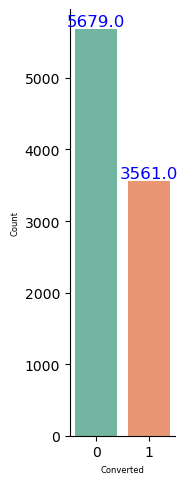

In [9]:

plot = sns.catplot(x="Converted", kind="count", data=Lead_data, palette="Set2", aspect= 0.4);

plt.xlabel("Converted", fontsize = 6)
plt.ylabel("Count", fontsize = 6)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

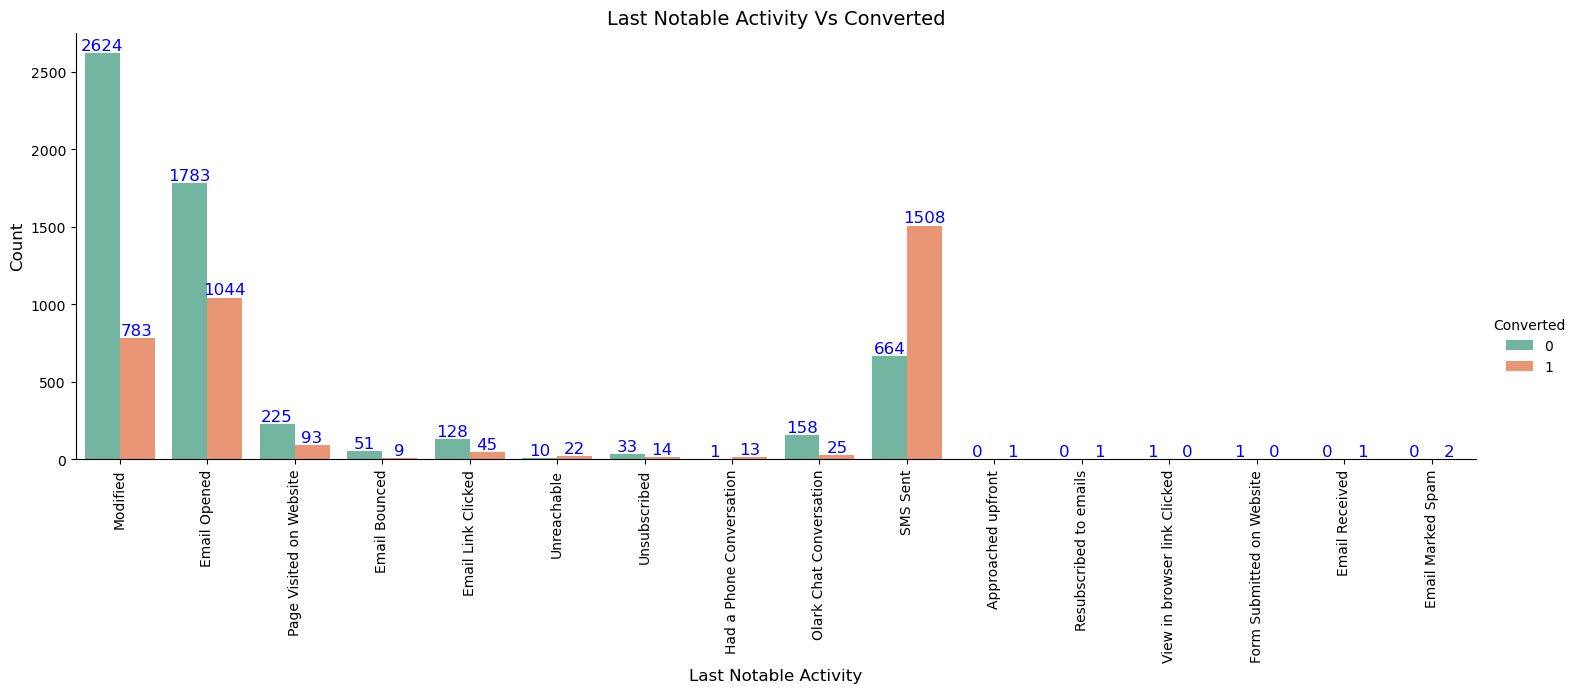

In [10]:

plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=Lead_data, palette="Set2", aspect = 3.0);

plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

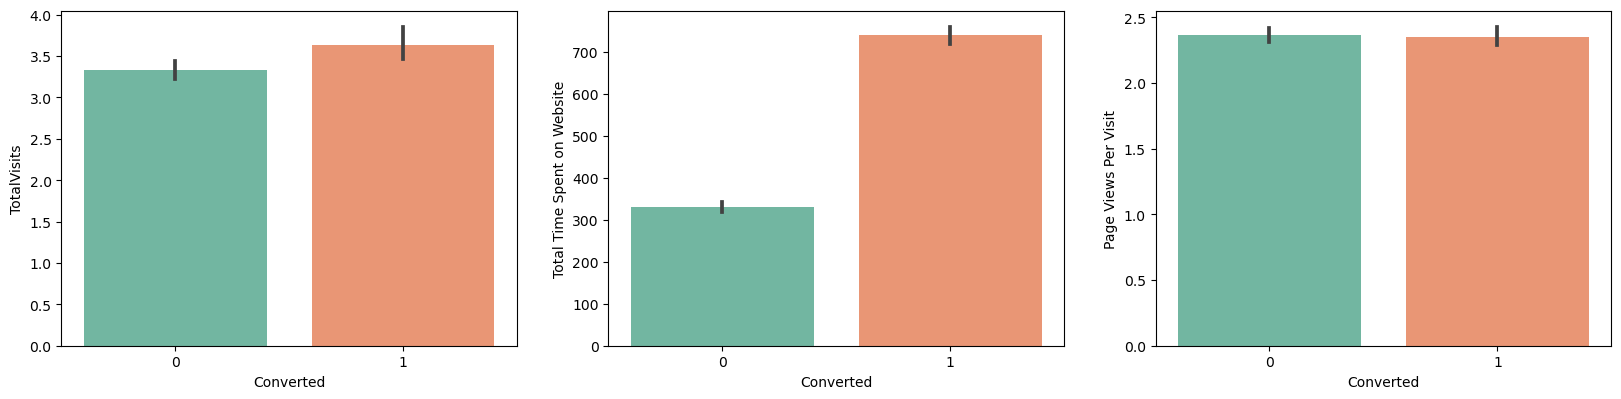

In [11]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = Lead_data)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = Lead_data)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = Lead_data)
plt.show()

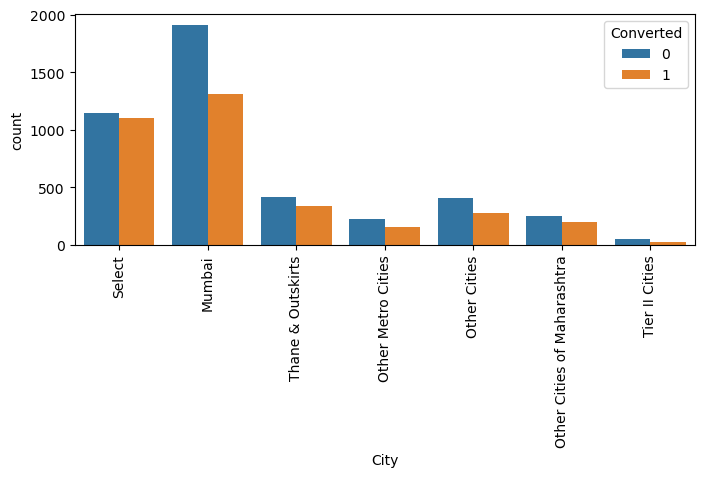

In [12]:
#Creating a visualization to show the distribution of data in the 'City' column

plt.figure(figsize=(8,3))
s1=sns.countplot(x='City', hue='Converted', data=Lead_data)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

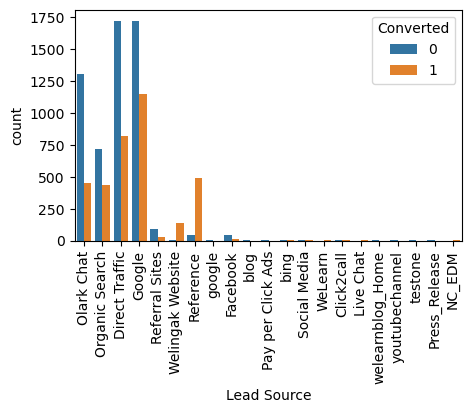

In [13]:
plt.figure(figsize=(5,3))
s1 = sns.countplot(x='Lead Source', hue='Converted', data=Lead_data)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

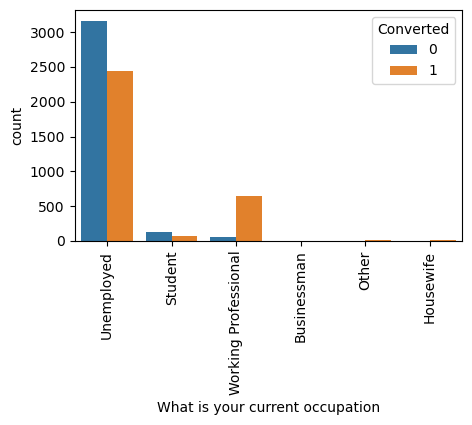

In [14]:
plt.figure(figsize=(5,3))
s1 = sns.countplot(x='What is your current occupation', hue='Converted', data=Lead_data)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

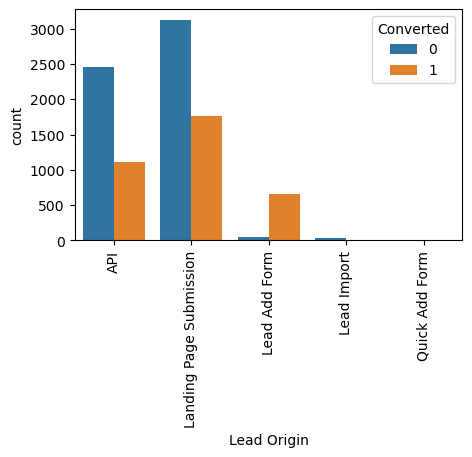

In [15]:
plt.figure(figsize=(5,3))
s1 = sns.countplot(x='Lead Origin', hue='Converted', data=Lead_data)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

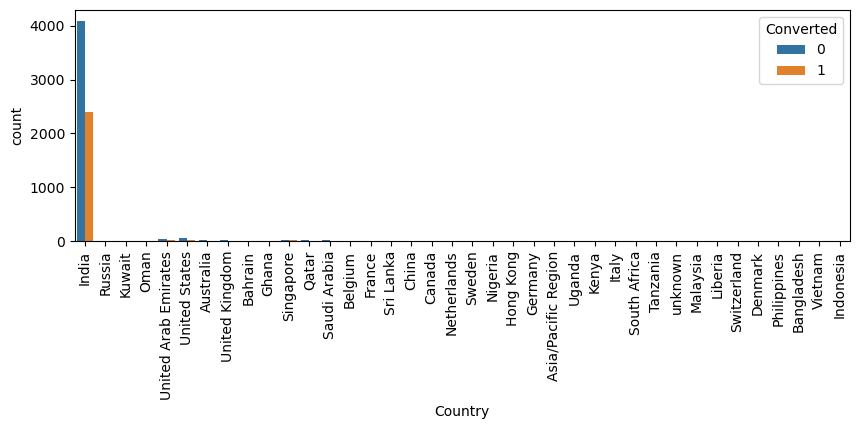

In [16]:
#Visualizing the distribution of the 'Country' column after replacing NaN values

plt.figure(figsize=(10,3))
s1 = sns.countplot(x='Country', hue='Converted', data=Lead_data)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [17]:
# Drop 'Country' as most of the data from india
Lead_data.drop(columns=['Country'], inplace=True)

## Step 1: Data Cleaning and Preparation

Now recall that there are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [18]:
# Get the value counts of all the columns

for col in Lead_data:
    print(Lead_data[col].astype('category').value_counts())

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference         

The following three columns now have the level 'Select'. Let's check them once again.

In [19]:
# checking value count 
Lead_data['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [20]:
Lead_data['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [21]:
Lead_data['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Clearly the levels `Lead Profile` and `How did you hear about X Education` have a lot of rows which have the value `Select` which is of no use to the analysis so it's best that we drop them.

In [22]:
# drop Lead Profile and How did you hear about X Education cols
Lead_data.drop(columns=['Lead Profile', 'How did you hear about X Education'], inplace=True)

Also notice that we got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque. Since practically all of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.

In [23]:
#drop all the above mentioned columns
cols_to_drop = [
    'Do Not Call','Do Not Email' ,'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 
    'Newspaper', 'Digital Advertisement', 'Through Recommendations', 
    'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
    'Get updates on DM Content', 'I agree to pay the amount through cheque'
]
Lead_data.drop(columns=cols_to_drop, axis=1,inplace=True)

Also, the variable What matters most to you in choosing a course has the level Better Career Prospects 6528 times while the other two levels appear once twice and once respectively. So we should drop this column as well.

In [24]:
Lead_data["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [25]:
Lead_data= Lead_data.drop(["What matters most to you in choosing a course"],axis=1)

#### Missing Value Handling

In [26]:
Lead_data.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
Tags                                      3353
Lead Quality                              4767
City                                      1420
Asymmetrique Activity Index               4218
Asymmetrique Profile Index                4218
Asymmetrique Activity Score               4218
Asymmetrique Profile Score                4218
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [27]:
# Checking the null value percentage in the dataset 
round(100*(Lead_data.isnull().sum()/len(Lead_data.index)), 2).sort_values(ascending=False)

Lead Quality                              51.59
Asymmetrique Activity Index               45.65
Asymmetrique Profile Score                45.65
Asymmetrique Activity Score               45.65
Asymmetrique Profile Index                45.65
Tags                                      36.29
What is your current occupation           29.11
Specialization                            15.56
City                                      15.37
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
A free copy of Mastering The Interview     0.00
Prospect ID                                0.00
Lead Number                                0.00
Total Time Spent on Website                0.00
Converted                                  0.00
Lead Origin                                0.00
Last Notable Activity                      0.00
dtype: float64

In [28]:
# Dropping columns that contain more than 40% null values
threshold = Lead_data.shape[0] * 0.60
Lead_data = Lead_data.dropna(axis=1, thresh=threshold)

In [29]:
# Specialization - We can impute the "Other_Specialization" into all the NULLs as most of the values belong to "Other_Specialization"
Lead_data['Specialization'] = Lead_data['Specialization'].replace(np.nan, 'Other_Specialization')

# Tags - We can impute the "Other_Tags" into all the NULLs as most of the values belong to "Other_Tags"
Lead_data['Tags'] = Lead_data['Tags'].replace(np.nan, 'Other_Tags')

# More than 85% data is of "Unemployed" and hence it is safer to impute NULLS with this value
Lead_data['What is your current occupation'] = Lead_data['What is your current occupation'].replace(np.nan, 'Unemployed')

# City - We can impute the MUMBAI into all the NULLs as most of the values belong to MUMBAI
Lead_data['City'] = Lead_data['City'].replace(np.nan, 'Mumbai')


In [30]:
# Checking the null value presentage in the dataset 
round(100*(Lead_data.isnull().sum()/len(Lead_data.index)), 2).sort_values(ascending=False)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Last Activity                             1.11
Lead Source                               0.39
Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Converted                                 0.00
Total Time Spent on Website               0.00
Specialization                            0.00
What is your current occupation           0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [31]:
# Remaining NULL values are less than 2% and hence these rows can be directly dropped
Lead_data.dropna(inplace = True)
print(Lead_data.shape)

(9074, 15)


In [32]:
Lead_data.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

#### Check for Duplicates

In [33]:
Lead_data.duplicated().sum()

0

#### Check for Outliers

In [34]:
Lead_data.dtypes

Prospect ID                                object
Lead Number                                 int64
Lead Origin                                object
Lead Source                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
Tags                                       object
City                                       object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

In [35]:
# Checking for outliers in the continuous variables
cont_data = Lead_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
cont_data.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9074.000000                  9074.000000           9074.000000
mean      3.456028                   482.887481              2.370151
std       4.858802                   545.256560              2.160871
min       0.000000                     0.000000              0.000000
25%       1.000000                    11.000000              1.000000
50%       3.000000                   246.000000              2.000000
75%       5.000000                   922.750000              3.200000
90%       7.000000                  1373.000000              5.000000
99%      17.000000                  1839.000000              9.000000
max     251.000000                  2272.000000             55.000000

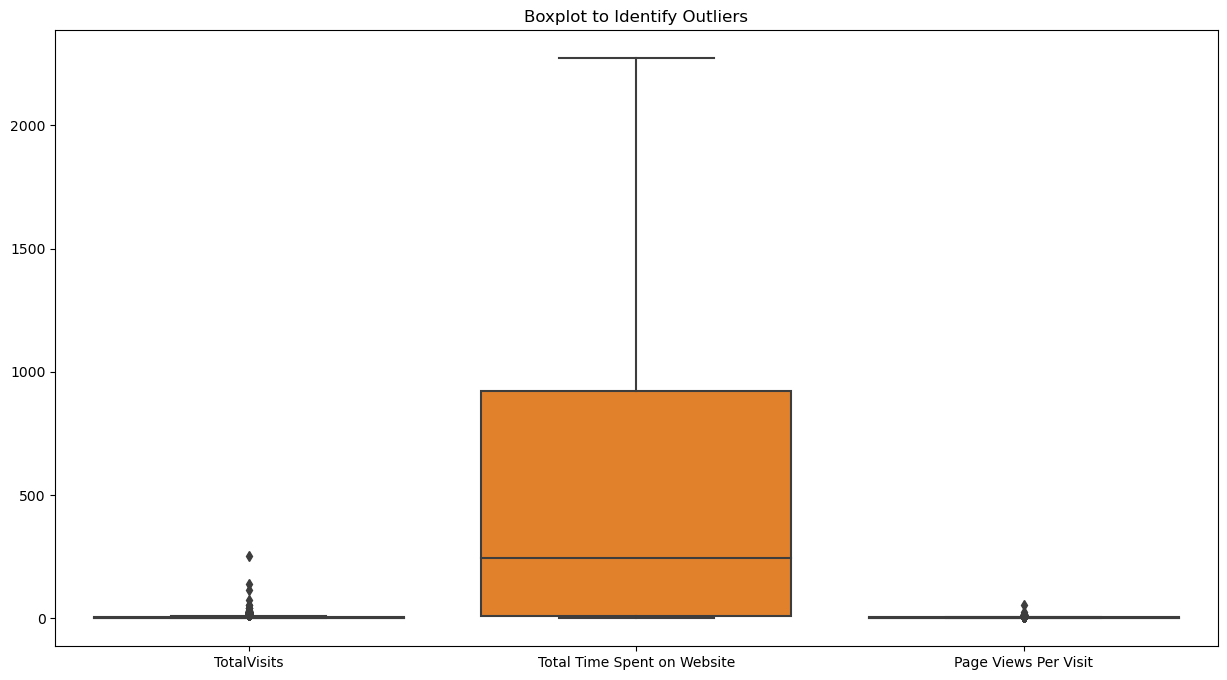

In [36]:
# Let's visualize these columns for a clearer understanding
plt.figure(figsize=(15,8))
sns.boxplot(data=cont_data)
plt.title('Boxplot to Identify Outliers')
plt.show()

Consistent Engagement: ‘Page Views Per Visit’ and 'TotalVisits' have consistent values, suggesting uniform engagement levels.

Data Cleaning Indication: Presence of outliers in certain variables may indicate the need for data cleaning before further analysis.

In [37]:
# Determine the 95th percentile of the Total Visits 
qua95 = Lead_data["TotalVisits"].quantile(0.95)

# Cap the outliers at the 95th percentile value 
Lead_data["TotalVisits"] = np.where(Lead_data["TotalVisits"] > qua95, qua95, Lead_data["TotalVisits"])
print(Lead_data["TotalVisits"].describe())

count    9074.000000
mean        3.191867
std         2.780618
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        10.000000
Name: TotalVisits, dtype: float64


Presence of outliers in certain variables may indicate the need for data cleaning before further analysis.

In [38]:
# Determine the 95th percentile of the Total Visits data
qua95 = Lead_data["Page Views Per Visit"].quantile(0.95)

# Cap the outliers at the 95th percentile value
Lead_data["Page Views Per Visit"] = np.where(Lead_data["Page Views Per Visit"] > qua95, qua95, Lead_data["Page Views Per Visit"])
print(Lead_data["Page Views Per Visit"].describe())

count    9074.000000
mean        2.265943
std         1.790991
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max         6.000000
Name: Page Views Per Visit, dtype: float64


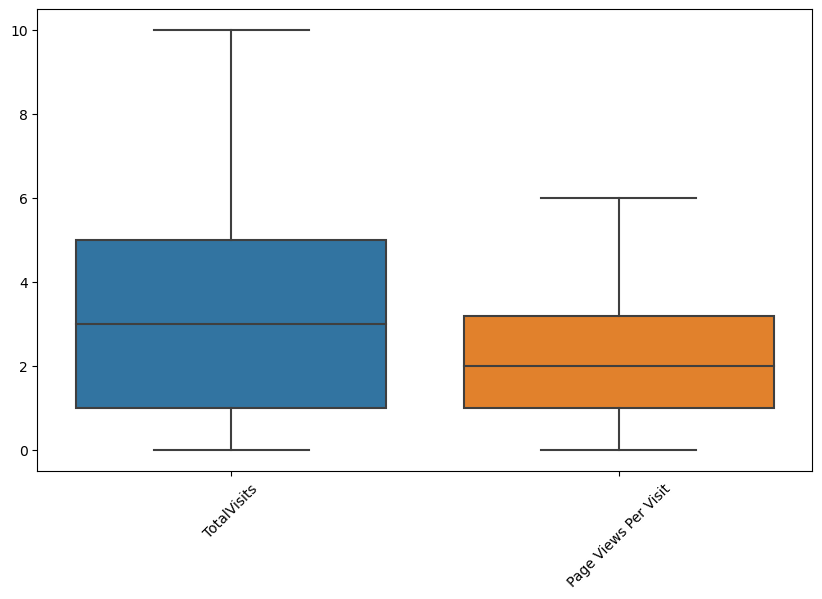

In [39]:
# Checking the plot again for the absence of outliers
lead_vis = Lead_data[['TotalVisits','Page Views Per Visit']]

plt.figure(figsize=(10,6))
sns.boxplot(data=lead_vis)
plt.xticks(rotation=45)
plt.show()

The outliers have been removed from the Total Visits and Page Views Per Visit columns.

TotalVisits: The median is around 3, with most data falling between 1 and 5. This suggests a moderate level of site visits.

Page Views per Visit: The median is around 2, with most data between 1 and 3. This indicates that each visit involves viewing a few pages.

In [40]:
# Let's look at the dataset again

Lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Converted  TotalVisits  Total Time Spent on Website  \
0      Olark Chat          0          0.0                            0   
1  Organic Search          0          5.0                          674   
2  Direct Traffic          1          2.0                         1532   
3  Direct Traffic          0          1.0                          305   
4          Google          1          2.0                         1428   

   Page Views Per Visit            Last Activity           Specialization  \
0                   0.0  Page Visited on Website                   Select   
1                   2.5             Email Opened                   Select   
2                   2.0             Email Opened  Business Administration   
3                   1.0              Unreachable    Media and Advertising   
4                   1.0        Converted to Lead                   Select   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

     City A free copy of Mastering The Interview Last Notable Activity  
0  Select                                     No              Modified  
1  Select                                     No          Email Opened  
2  Mumbai                                    Yes          Email Opened  
3  Mumbai                                     No              Modified  
4  Mumbai                                     No              Modified

Now, clearly the variables `Prospect ID` and `Lead Number` won't be of any use in the analysis, so it's best that we drop these two variables.

In [41]:
#drop Prospect ID and Lead Number
Lead_data.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [42]:
Lead_data.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0                   Select                      Unemployed   
1                   Select                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                   Select                      Unemployed   

                                  Tags    City  \
0          Interested in other courses  Select   
1                              Ringing  Select   
2  Will revert after reading the email  Mumbai   
3                              Ringing  Mumbai   
4  Will revert after reading the email  Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [43]:
Lead_data.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [44]:
Lead_data.shape

(9074, 13)

### Dummy variable creation

The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [45]:
# Check the columns which are of type 'object'

temp = Lead_data.loc[ : , Lead_data.dtypes == "object" ]
temp.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [46]:
# Encoding the variables with yes/no labels as 1/0
for column in Lead_data:
    if Lead_data[column].dtype=='object':
        Lead_data[column] = Lead_data[column].replace({'Yes':1,'No':0})
Lead_data.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0                   Select                      Unemployed   
1                   Select                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                   Select                      Unemployed   

                                  Tags    City  \
0          Interested in other courses  Select   
1                              Ringing  Select   
2  Will revert after reading the email  Mumbai   
3                              Ringing  Mumbai   
4  Will revert after reading the email  Mumbai   

   A free copy of Mastering The Interview Last Notable Activity  
0                                       0              Modified  
1                                       0          Email Opened  
2                                       1          Email Opened  
3                                       0              Modified  
4                                       0              Modified

In [47]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(Lead_data[[
    'Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'Tags', 'City', 'Last Notable Activity'
]],drop_first=True,dtype='int64')



In [48]:
dummy.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_NC_EDM  \
0                   0                      0                   0   
1                   0                      0                   0   
2                   0                      0                   0   
3                   0                      0                   0   
4                   1                      0                   0   

   Lead Source_Olark Chat  Lead Source_Organic Search  ...  \
0                       1                           0  ...   
1                       0                           1  ...   
2                       0                           0  ...   
3                       0                           0  ...   
4                       0                           0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1         

In [49]:
# Now drop the variables for which the dummy variables have been created
Lead_data= Lead_data.drop([
    'Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation','Tags', 'City', 'Last Notable Activity'
],axis=1)

In [50]:
# Add the results to the master dataframe
Lead_data = pd.concat([Lead_data, dummy], axis=1)
Lead_data.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   ...  Last Notable Activity_Form Submitted on Website  \
0  ...                                                0   
1  ...                                                0   
2  ...                                                0   
3  ...                                                0   
4  ...                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1         

In [51]:
# Let's take a look at the dataset again

Lead_data.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   ...  Last Notable Activity_Form Submitted on Website  \
0  ...                                                0   
1  ...                                                0   
2  ...                                                0   
3  ...                                                0   
4  ...                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1         

In [52]:
Lead_data.shape

(9074, 115)

### Test-Train Split

The next step is to split the dataset into training an testing sets.

In [53]:
# Import the required library

from sklearn.model_selection import train_test_split

In [54]:
# Put all the feature variables in X

X = Lead_data.loc[:, Lead_data.columns != 'Converted']
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  ...  Last Notable Activity_Form Submitted on Website  \
0                   0  ...                                                0   
1                   0  ...                                                0   
2                   0  ...                                                0   
3                   0  ...                                                0   
4                   1  ...                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed 

In [55]:
# Put the target variable in y

y = Lead_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [56]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3, random_state=100)

### Scaling

Now there are a few numeric variables present in the dataset which have different scales,scale these variables.

In [57]:
X_train.head(15)

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3009          2.0                          397                   2.0   
1012          2.0                          190                   2.0   
9226          0.0                            0                   0.0   
4750          2.0                         1380                   2.0   
7987          5.0                         1584                   2.5   
1281          4.0                          984                   2.0   
2880          3.0                            4                   3.0   
4971          7.0                         1522                   6.0   
7536          5.0                         1978                   5.0   
1248          2.0                         1497                   2.0   
1429          2.0                         1288                   2.0   
2178          5.0                           94                   5.0   
8554          2.0                          141                   2.0   
5044          0.0                            0                   0.0   
3475          5.0                         1366                   2.5   

      A free copy of Mastering The Interview  \
3009                                       1   
1012                                       0   
9226                                       0   
4750                                       0   
7987                                       0   
1281                                       0   
2880                                       0   
4971                                       0   
7536                                       1   
1248                                       1   
1429                                       0   
2178                                       0   
8554                                       1   
5044                                       0   
3475                                       1   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3009                                    1                          0   
1012                                    1                          0   
9226                                    0                          0   
4750                                    1                          0   
7987                                    1                          0   
1281                                    1                          0   
2880                                    1                          0   
4971                                    0                          0   
7536                                    1                          0   
1248                                    1                          0   
1429                                    1                          0   
2178                                    1                          0   
8554                                    1                          0   
5044                                    0                          0   
3475                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
3009                        0                           1   
1012                        0                           1   
9226                        0                           0   
4750                        0                           1   
7987                        0                           1   
1281                        0                           0   
2880                        0                           0   
4971                        0                           0   
7536                        0                           1   
1248                        0                           1   
1429                        0                           0   
2178                        0                           1   
8554                        0                           1   
5044                        0                           0   
3475            

In [58]:
# Scaling the three numeric features.
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()


TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3009    -0.432779                    -0.160255             -0.155018   
1012    -0.432779                    -0.540048             -0.155018   
9226    -1.150329                    -0.888650             -1.265540   
4750    -0.432779                     1.643304             -0.155018   
7987     0.643547                     2.017593              0.122613   

      A free copy of Mastering The Interview  \
3009                                       1   
1012                                       0   
9226                                       0   
4750                                       0   
7987                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3009                                    1                          0   
1012                                    1                          0   
9226                                    0                          0   
4750                                    1                          0   
7987                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
3009                        0                           1   
1012                        0                           1   
9226                        0                           0   
4750                        0                           1   
7987                        0                           1   

      Lead Source_Facebook  Lead Source_Google  ...  \
3009                     0                   0  ...   
1012                     0                   0  ...   
9226                     0                   0  ...   
4750                     0                   0  ...   
7987                     0                   0  ...   

      Last Notable Activity_Form Submitted on Website  \
3009                                                0   
1012                                                0   
9226                                                0   
4750                                                0   
7987                                                0   

      Last Notable Activity_Had a Phone Conversation  \
3009                                               0   
1012                                               0   
9226                                               0   
4750                                               0   
7987                                               0   

      Last Notable Activity_Modified  \
3009                               0   
1012                               0   
9226                               1   
4750                               0   
7987                               1   

      Last Notable Activity_Olark Chat Conversation  \
3009                                              0   
1012                                              0   
9226                                              0   
4750                                              0   
7987                                              0   

      Last Notable Activity_Page Visited on Website  \
3009                                              0   
1012                                              0   
9226                                              0   
4750                                              0   
7987                                              0   

      Last Notable Activity_Resubscribed to emails  \
3009                                             0   
1012                                             0   
9226                                             0   
4750                                             0   
7987                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
3009                               0                                  0   
1012                               0                                  0   
9226                

### Correlation

Let's now look at the correlations. 

In [59]:
'''correlation_matrix = X_train_scaled.corr()
correlation_matrix = X_train_scaled.corr()
plt.figure(figsize=(12, 10))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()'''

'correlation_matrix = X_train_scaled.corr()\ncorrelation_matrix = X_train_scaled.corr()\nplt.figure(figsize=(12, 10))  # Set the figure size\nsns.heatmap(correlation_matrix, annot=True, cmap=\'coolwarm\', fmt=".2f", linewidths=.5)\nplt.title(\'Correlation Heatmap\')\nplt.show()'

Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

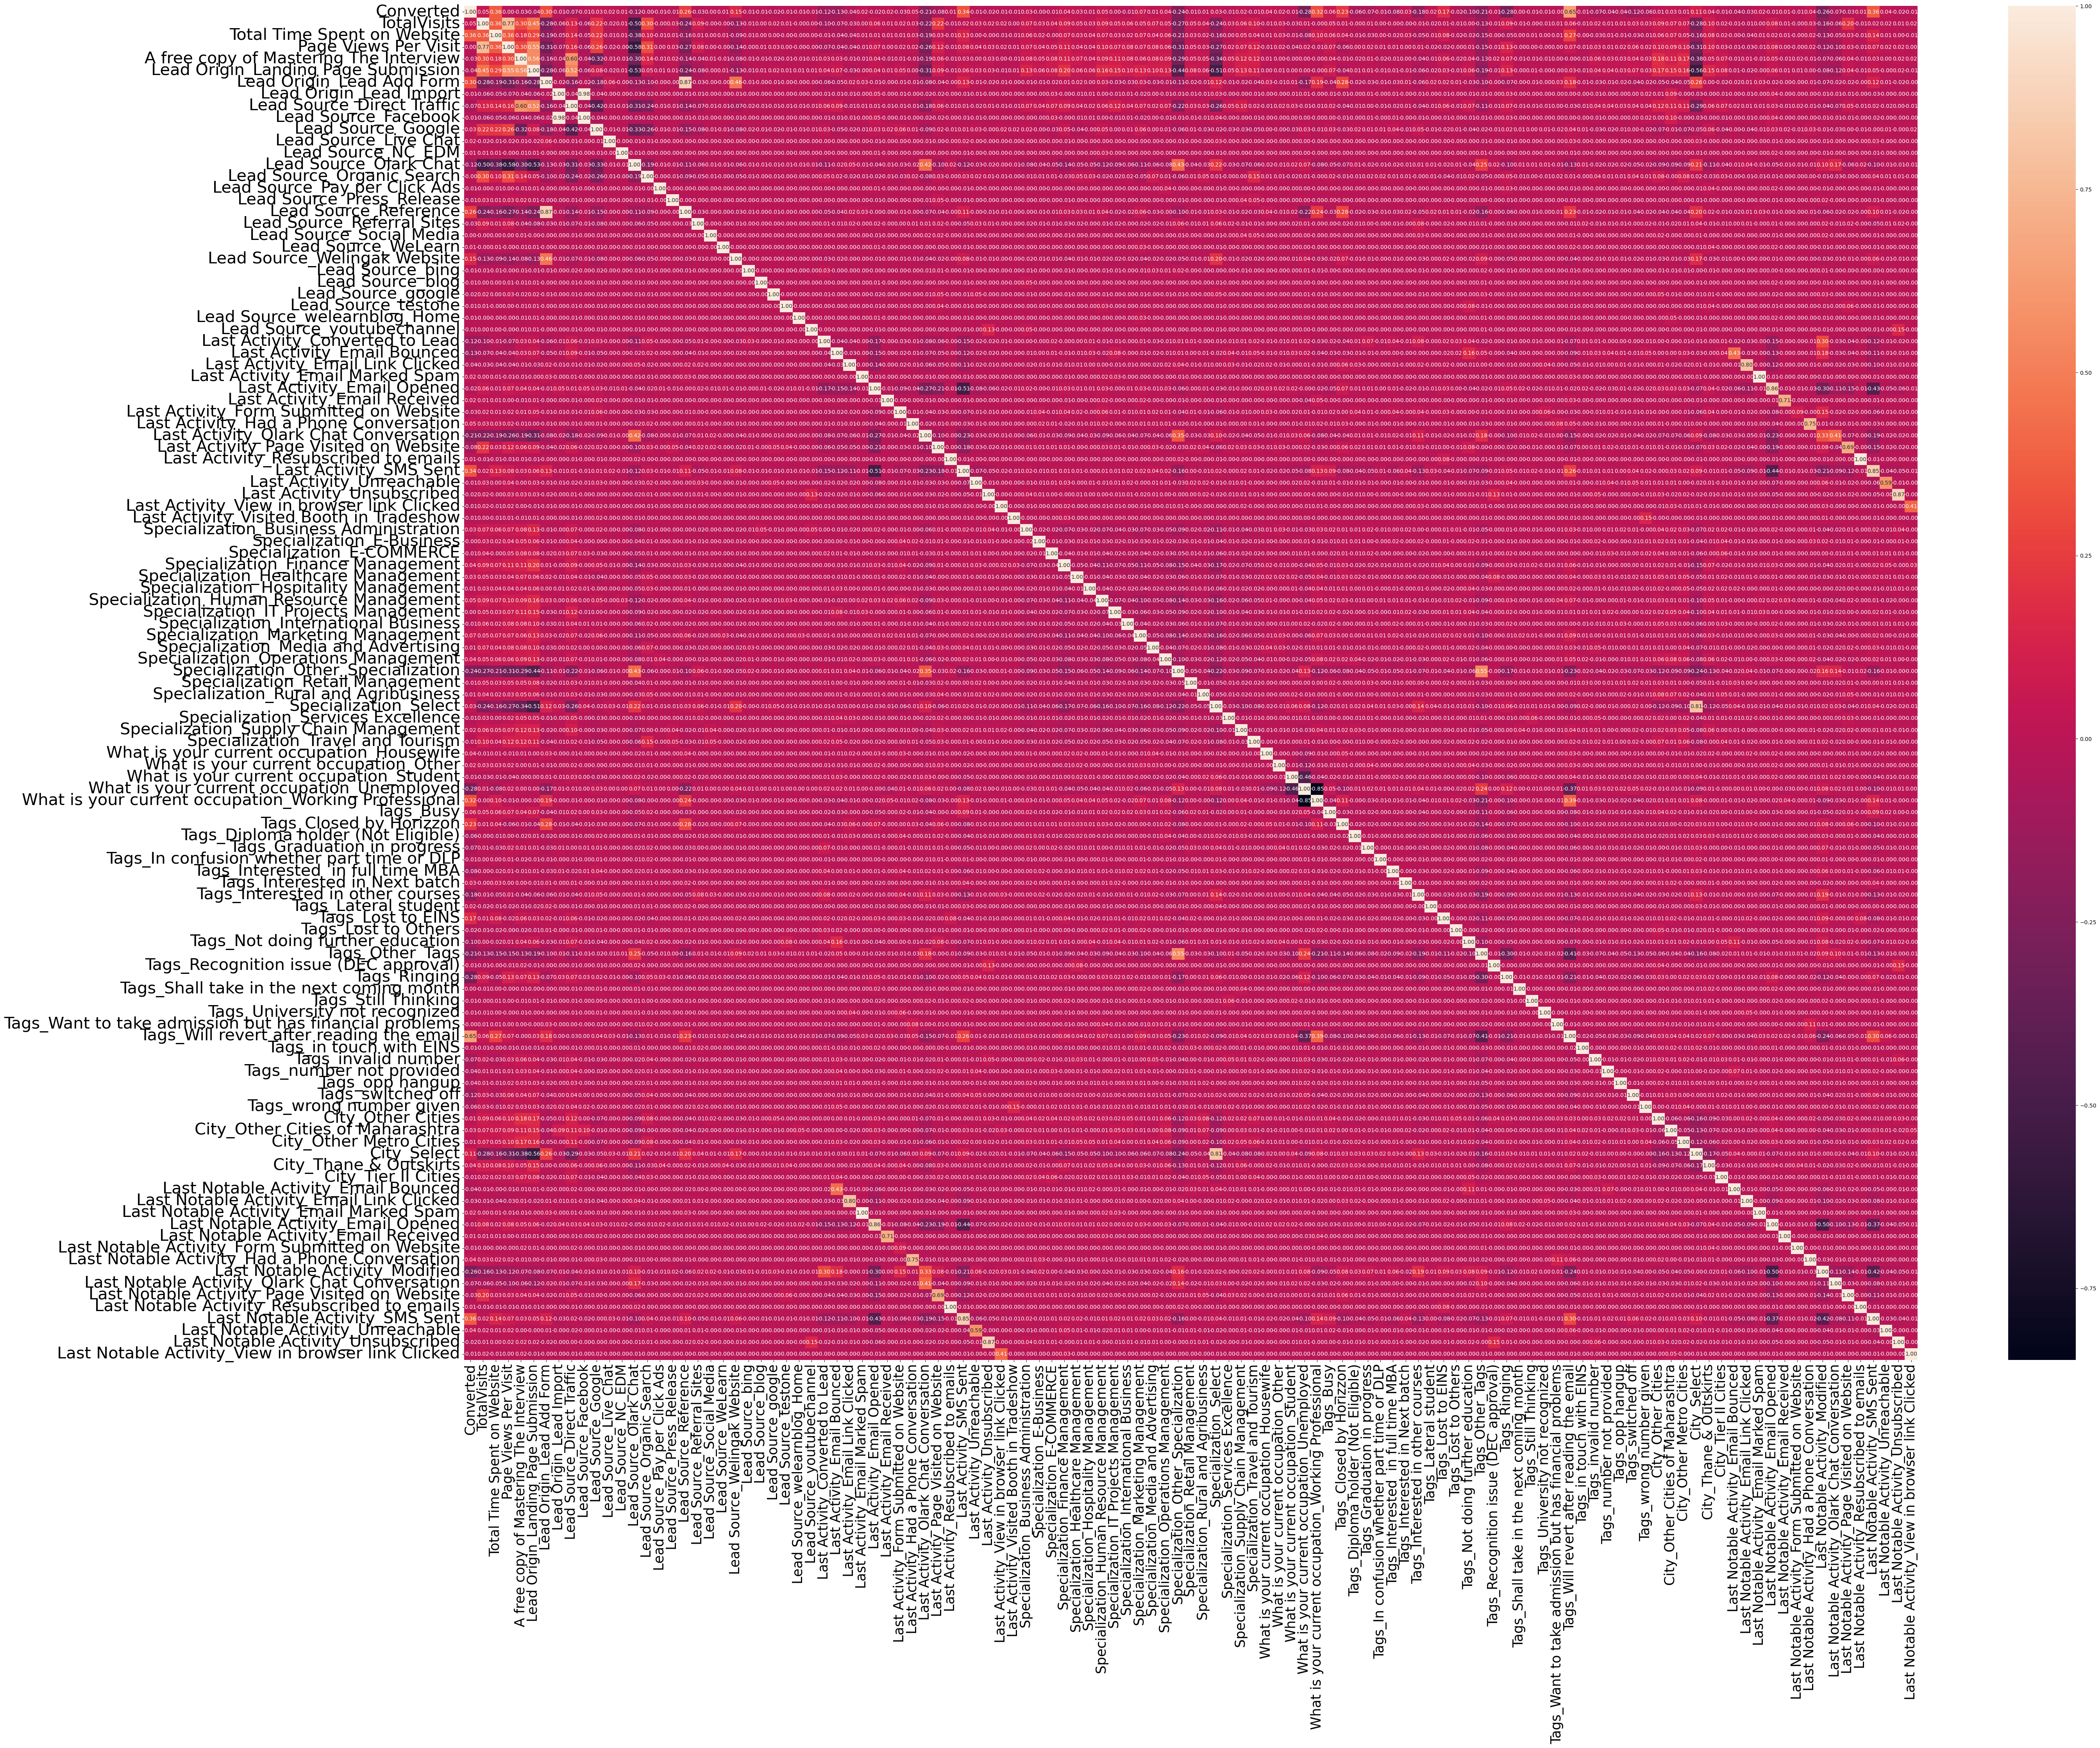

In [60]:
# Excluding the non-numeric 'Prospect ID' column
num_lead = Lead_data

# Let's see the correlation matrix
plt.figure(figsize = (60,45))        # Size of the figure
sns.heatmap(num_lead.corr(), annot=True, fmt='.2f')
plt.yticks(fontsize=30)
plt.xticks(fontsize=25)
plt.show()

In [61]:
corre = X_train.corr().where(np.triu(np.ones(X_train.corr().shape), k=1).astype(bool)).stack().sort_values(ascending=False).head(10)

corre

Last Activity_Email Marked Spam         Last Notable Activity_Email Marked Spam           1.000000
Last Activity_Resubscribed to emails    Last Notable Activity_Resubscribed to emails      1.000000
Lead Origin_Lead Import                 Lead Source_Facebook                              0.979718
Lead Origin_Lead Add Form               Lead Source_Reference                             0.859537
Last Activity_Email Opened              Last Notable Activity_Email Opened                0.858361
Last Activity_SMS Sent                  Last Notable Activity_SMS Sent                    0.851814
Last Activity_Unsubscribed              Last Notable Activity_Unsubscribed                0.846581
Last Activity_Had a Phone Conversation  Last Notable Activity_Had a Phone Conversation    0.839837
Specialization_Select                   City_Select                                       0.809669
Last Activity_Email Link Clicked        Last Notable Activity_Email Link Clicked          0.804444
dtype: flo

## Step 2: Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [62]:
# model building
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve


In [63]:
# Logistic regression model
log1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6239
Model Family:                Binomial   Df Model:                          111
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1023.1
Date:                Mon, 24 Jun 2024   Deviance:                       2046.3
Time:                        18:37:10   Pearson chi2:                 1.52e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6361
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     24.3217   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
TotalVisits                                                0.3504      0.097      3.606      0.000       0.160       0.541
Total Time Spent on Website                                1.1834      0.070     16.947      0.000       1.047       1.320
Page Views Per Visit                                      -0.4209      0.110     -3.813      0.000      -0.637      -0.205
A free copy of Mastering The Interview                    -0.2409      0.196     -1.231      0.218      -0.625       0.143
Lead Origin_Landing Page Submission                       -0.7679      0.273     -2.809      0.005      -1.304      -0.232
Lead Origin_Lead Add Form                                 -4.3633      5.846     -0.746      0.455     -15.821       7.095
Lead Origin_Lead Import                                   27.9807   2.16e+05      0.000      1.000   -4.24e+05    4.24e+05
Lead Source_Direct Traffic                                -5.1882      6.759     -0.768      0.443     -18.436       8.059
Lead Source_Facebook                                     -32.1504   2.16e+05     -0.000      1.000   -4.24e+05    4.24e+05
Lead Source_Google                                        -5.0335      6.757     -0.745      0.456     -18.277       8.210
Lead Source_Live Chat                                     18.7674   1.53e+05      0.000      1.000   -2.99e+05    2.99e+05
Lead Source_NC_EDM                                        20.6758   2.16e+05   9.56e-05      1.000   -4.24e+05    4.24e+05
Lead Source_Olark Chat                                    -4.0607      6.750     -0.602      0.547     -17.291       9.170
Lead Source_Organic Search                                -5.1744      6.760     -0.765      0.444     -18.424       8.075
Lead Source_Pay per Click Ads                            -23.5323   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Press_Release                                -28.3842   2.17e+05     -0.000      1.000   -4.25e+05    4.25e+05
Lead Source_Reference                                     -0.3618      3.402     -0.106      0.915      -7.029       6.305
Lead Source_Referral Sites                                -4.9036      6.776     -0.724      0.469     -18.185       8.378
Lead Source_Social Media                                  -2.6539     11.697     -0.227      0.821     -25.579      20.271
Lead Source_WeLearn                                     7.744e-09   7.43e-05      0.000      1.000      -0.000       0.000
Lead Source_Welingak Website                               3.2280      3.460      0.933      0.351      -3.553      10.009
Lead Sou

In [64]:
# Importing 'LogisticRegression' and create a LogisticRegression object "logreg"

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


In [65]:

# Import RFE and select 15 variables 
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)      # running RFE with 15 variables 
rfe = rfe.fit(X_train, y_train)

In [66]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))



[('TotalVisits', False, 37),
 ('Total Time Spent on Website', False, 5),
 ('Page Views Per Visit', False, 36),
 ('A free copy of Mastering The Interview', False, 39),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', False, 6),
 ('Lead Origin_Lead Import', False, 19),
 ('Lead Source_Direct Traffic', False, 56),
 ('Lead Source_Facebook', False, 59),
 ('Lead Source_Google', False, 58),
 ('Lead Source_Live Chat', False, 97),
 ('Lead Source_NC_EDM', False, 18),
 ('Lead Source_Olark Chat', False, 7),
 ('Lead Source_Organic Search', False, 57),
 ('Lead Source_Pay per Click Ads', False, 98),
 ('Lead Source_Press_Release', False, 67),
 ('Lead Source_Reference', False, 53),
 ('Lead Source_Referral Sites', False, 60),
 ('Lead Source_Social Media', False, 85),
 ('Lead Source_WeLearn', False, 100),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_blog', False, 55),
 ('Lead Source_google', False, 35),
 ('Lead Source_testone

In [67]:
print("Selected features:", X_train.columns[rfe.support_])
#print("Feature ranking:", rfe.ranking_)

Selected features: Index(['Lead Origin_Landing Page Submission', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Specialization_Other_Specialization',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')


In [68]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [69]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1263.0
Date:                Mon, 24 Jun 2024   Deviance:                       2526.0
Time:                        18:37:31   Pearson chi2:                 1.18e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6075
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.4861      0.192    -12.970      0.000      -2.862      -2.110
Lead Origin_Landing Page Submission         -1.5269      0.131    -11.644      0.000      -1.784      -1.270
Lead Source_Welingak Website                 3.0419      0.739      4.115      0.000       1.593       4.491
Last Activity_SMS Sent                       1.4084      0.227      6.198      0.000       0.963       1.854
Specialization_Other_Specialization         -2.0255      0.164    -12.372      0.000      -2.346      -1.705
Tags_Busy                                    2.6509      0.299      8.875      0.000       2.065       3.236
Tags_Closed by Horizzon                      8.8482      0.743     11.911      0.000       7.392      10.304
Tags_Lost to EINS                            8.4465      0.747     11.307      0.000       6.982       9.911
Tags_Other_Tags                              2.3743      0.201     11.807      0.000       1.980       2.768
Tags_Ringing                                -1.8641      0.308     -6.051      0.000      -2.468      -1.260
Tags_Will revert after reading the email     7.0055      0.264     26.523      0.000       6.488       7.523
Tags_invalid number                        -22.3390   1.52e+04     -0.001      0.999   -2.98e+04    2.97e+04
Tags_switched off                           -1.9033      0.561     -3.395      0.001      -3.002      -0.805
Tags_wrong number given                    -22.0131   2.14e+04     -0.001      0.999    -4.2e+04     4.2e+04
Last Notable Activity_Modified              -1.2740      0.154     -8.289      0.000      -1.575      -0.973
Last Notable Activity_SMS Sent               1.1349      0.261      4.344      0.000       0.623       1.647
============================================================================================================
"""

There are few variable which have a p-value greater than `0.05`. 
look at the VIFs.

In [70]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
def calculate_vif(X_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_train.columns
    vif_df['Variance Inflation Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df['Variance Inflation Factor'] = round(vif_df['Variance Inflation Factor'], 2)
    vif_df = vif_df.sort_values(by = 'Variance Inflation Factor', ascending = False)
    print(vif_df)
    
# Calucating VIF
calculate_vif(X_train[col])

                                    Features  Variance Inflation Factor
14            Last Notable Activity_SMS Sent                       6.17
2                     Last Activity_SMS Sent                       6.00
7                            Tags_Other_Tags                       2.76
0        Lead Origin_Landing Page Submission                       2.35
3        Specialization_Other_Specialization                       2.11
13            Last Notable Activity_Modified                       1.80
9   Tags_Will revert after reading the email                       1.69
8                               Tags_Ringing                       1.38
4                                  Tags_Busy                       1.10
1               Lead Source_Welingak Website                       1.09
11                         Tags_switched off                       1.09
5                    Tags_Closed by Horizzon                       1.07
6                          Tags_Lost to EINS                    

In [72]:
# Since the VIF is high
col= col.drop("Last Notable Activity_SMS Sent")
col

Index(['Lead Origin_Landing Page Submission', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Specialization_Other_Specialization',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Modified'],
      dtype='object')

VIFs seem to be in a decent range except for 2variables. 

Let's first drop the variable `Last Notable Activity_SMS Sent` since it has a high VIF.

In [73]:
# Refit the model with the new set of features
X_train_sm= sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res= logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1272.7
Date:                Mon, 24 Jun 2024   Deviance:                       2545.4
Time:                        18:37:31   Pearson chi2:                 1.22e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6063
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.3641      0.187    -12.612      0.000      -2.732      -1.997
Lead Origin_Landing Page Submission         -1.5417      0.131    -11.797      0.000      -1.798      -1.286
Lead Source_Welingak Website                 3.0268      0.745      4.062      0.000       1.566       4.487
Last Activity_SMS Sent                       2.2500      0.117     19.164      0.000       2.020       2.480
Specialization_Other_Specialization         -1.9840      0.162    -12.253      0.000      -2.301      -1.667
Tags_Busy                                    2.6739      0.293      9.124      0.000       2.099       3.248
Tags_Closed by Horizzon                      9.0804      0.744     12.202      0.000       7.622      10.539
Tags_Lost to EINS                            8.6322      0.750     11.505      0.000       7.162      10.103
Tags_Other_Tags                              2.3278      0.200     11.657      0.000       1.936       2.719
Tags_Ringing                                -1.7384      0.304     -5.721      0.000      -2.334      -1.143
Tags_Will revert after reading the email     7.0866      0.266     26.597      0.000       6.564       7.609
Tags_invalid number                        -22.2240   1.53e+04     -0.001      0.999      -3e+04       3e+04
Tags_switched off                           -1.7547      0.558     -3.146      0.002      -2.848      -0.662
Tags_wrong number given                    -21.9151   2.16e+04     -0.001      0.999   -4.24e+04    4.24e+04
Last Notable Activity_Modified              -1.7125      0.127    -13.521      0.000      -1.961      -1.464
============================================================================================================
"""

In [74]:
calculate_vif(X_train[col])

                                    Features  Variance Inflation Factor
7                            Tags_Other_Tags                       2.75
0        Lead Origin_Landing Page Submission                       2.34
3        Specialization_Other_Specialization                       2.10
2                     Last Activity_SMS Sent                       1.68
9   Tags_Will revert after reading the email                       1.64
13            Last Notable Activity_Modified                       1.48
8                               Tags_Ringing                       1.36
1               Lead Source_Welingak Website                       1.09
4                                  Tags_Busy                       1.09
11                         Tags_switched off                       1.09
5                    Tags_Closed by Horizzon                       1.07
6                          Tags_Lost to EINS                       1.06
10                       Tags_invalid number                    

VIF value is pretty good. Now we can check for p-value.

In [75]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, sm.add_constant(X_train_sm), family=sm.families.Binomial())
logm4.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1272.7
Date:                Mon, 24 Jun 2024   Deviance:                       2545.4
Time:                        18:37:32   Pearson chi2:                 1.22e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6063
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.3641      0.187    -12.612      0.000      -2.732      -1.997
Lead Origin_Landing Page Submission         -1.5417      0.131    -11.797      0.000      -1.798      -1.286
Lead Source_Welingak Website                 3.0268      0.745      4.062      0.000       1.566       4.487
Last Activity_SMS Sent                       2.2500      0.117     19.164      0.000       2.020       2.480
Specialization_Other_Specialization         -1.9840      0.162    -12.253      0.000      -2.301      -1.667
Tags_Busy                                    2.6739      0.293      9.124      0.000       2.099       3.248
Tags_Closed by Horizzon                      9.0804      0.744     12.202      0.000       7.622      10.539
Tags_Lost to EINS                            8.6322      0.750     11.505      0.000       7.162      10.103
Tags_Other_Tags                              2.3278      0.200     11.657      0.000       1.936       2.719
Tags_Ringing                                -1.7384      0.304     -5.721      0.000      -2.334      -1.143
Tags_Will revert after reading the email     7.0866      0.266     26.597      0.000       6.564       7.609
Tags_invalid number                        -22.2240   1.53e+04     -0.001      0.999      -3e+04       3e+04
Tags_switched off                           -1.7547      0.558     -3.146      0.002      -2.848      -0.662
Tags_wrong number given                    -21.9151   2.16e+04     -0.001      0.999   -4.24e+04    4.24e+04
Last Notable Activity_Modified              -1.7125      0.127    -13.521      0.000      -1.961      -1.464
============================================================================================================
"""

In [76]:
# Since the p-value is high
col= col.drop("Tags_invalid number")
col

Index(['Lead Origin_Landing Page Submission', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Specialization_Other_Specialization',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_Modified'],
      dtype='object')

In [77]:
calculate_vif(X_train[col])

                                    Features  Variance Inflation Factor
7                            Tags_Other_Tags                       2.73
0        Lead Origin_Landing Page Submission                       2.30
3        Specialization_Other_Specialization                       2.10
2                     Last Activity_SMS Sent                       1.67
9   Tags_Will revert after reading the email                       1.62
12            Last Notable Activity_Modified                       1.48
8                               Tags_Ringing                       1.35
1               Lead Source_Welingak Website                       1.09
4                                  Tags_Busy                       1.09
10                         Tags_switched off                       1.08
5                    Tags_Closed by Horizzon                       1.07
6                          Tags_Lost to EINS                       1.06
11                   Tags_wrong number given                    

In [78]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train, sm.add_constant(X_train_sm), family=sm.families.Binomial())
logm5.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1278.2
Date:                Mon, 24 Jun 2024   Deviance:                       2556.4
Time:                        18:37:32   Pearson chi2:                 1.21e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6057
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.5123      0.188    -13.360      0.000      -2.881      -2.144
Lead Origin_Landing Page Submission         -1.5556      0.130    -11.934      0.000      -1.811      -1.300
Lead Source_Welingak Website                 3.0117      0.744      4.046      0.000       1.553       4.471
Last Activity_SMS Sent                       2.2204      0.116     19.065      0.000       1.992       2.449
Specialization_Other_Specialization         -1.9934      0.161    -12.347      0.000      -2.310      -1.677
Tags_Busy                                    2.8500      0.290      9.813      0.000       2.281       3.419
Tags_Closed by Horizzon                      9.2197      0.745     12.382      0.000       7.760      10.679
Tags_Lost to EINS                            8.7745      0.751     11.691      0.000       7.303      10.246
Tags_Other_Tags                              2.4910      0.198     12.561      0.000       2.102       2.880
Tags_Ringing                                -1.5608      0.301     -5.179      0.000      -2.152      -0.970
Tags_Will revert after reading the email     7.2375      0.267     27.153      0.000       6.715       7.760
Tags_switched off                           -1.5742      0.556     -2.830      0.005      -2.664      -0.484
Tags_wrong number given                    -20.7387   1.32e+04     -0.002      0.999   -2.58e+04    2.58e+04
Last Notable Activity_Modified              -1.6886      0.126    -13.367      0.000      -1.936      -1.441
============================================================================================================
"""

In [79]:
# Since the p-value is high
col= col.drop("Tags_wrong number given")
col

Index(['Lead Origin_Landing Page Submission', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Specialization_Other_Specialization',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Modified'],
      dtype='object')

In [80]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train, sm.add_constant(X_train_sm), family=sm.families.Binomial())
logm6.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1280.2
Date:                Mon, 24 Jun 2024   Deviance:                       2560.3
Time:                        18:37:32   Pearson chi2:                 1.21e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6054
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.5660      0.188    -13.636      0.000      -2.935      -2.197
Lead Origin_Landing Page Submission         -1.5679      0.130    -12.034      0.000      -1.823      -1.313
Lead Source_Welingak Website                 3.0019      0.744      4.034      0.000       1.543       4.460
Last Activity_SMS Sent                       2.2121      0.116     19.020      0.000       1.984       2.440
Specialization_Other_Specialization         -2.0016      0.161    -12.406      0.000      -2.318      -1.685
Tags_Busy                                    2.9186      0.289     10.096      0.000       2.352       3.485
Tags_Closed by Horizzon                      9.2779      0.745     12.460      0.000       7.818      10.737
Tags_Lost to EINS                            8.8345      0.750     11.772      0.000       7.364      10.305
Tags_Other_Tags                              2.5546      0.197     12.951      0.000       2.168       2.941
Tags_Ringing                                -1.4957      0.300     -4.980      0.000      -2.084      -0.907
Tags_Will revert after reading the email     7.2995      0.266     27.431      0.000       6.778       7.821
Tags_switched off                           -1.5077      0.556     -2.713      0.007      -2.597      -0.419
Last Notable Activity_Modified              -1.6823      0.126    -13.327      0.000      -1.930      -1.435
============================================================================================================
"""

In [81]:
calculate_vif(X_train[col])

                                    Features  Variance Inflation Factor
7                            Tags_Other_Tags                       2.71
0        Lead Origin_Landing Page Submission                       2.29
3        Specialization_Other_Specialization                       2.10
2                     Last Activity_SMS Sent                       1.67
9   Tags_Will revert after reading the email                       1.61
11            Last Notable Activity_Modified                       1.47
8                               Tags_Ringing                       1.34
1               Lead Source_Welingak Website                       1.09
4                                  Tags_Busy                       1.09
10                         Tags_switched off                       1.08
5                    Tags_Closed by Horizzon                       1.07
6                          Tags_Lost to EINS                       1.06


P values seems to be pretty good. All the p-values and VIF values are now in the appropriate range. We are good to go!

## Step 3: Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [82]:
print(X_train.shape)
print(res.params.shape)

(6351, 114)
(15,)


In [83]:
logm1 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6239
Model Family:                Binomial   Df Model:                          111
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1023.1
Date:                Mon, 24 Jun 2024   Deviance:                       2046.3
Time:                        18:37:33   Pearson chi2:                 1.52e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6361
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     24.3217   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
TotalVisits                                                0.3504      0.097      3.606      0.000       0.160       0.541
Total Time Spent on Website                                1.1834      0.070     16.947      0.000       1.047       1.320
Page Views Per Visit                                      -0.4209      0.110     -3.813      0.000      -0.637      -0.205
A free copy of Mastering The Interview                    -0.2409      0.196     -1.231      0.218      -0.625       0.143
Lead Origin_Landing Page Submission                       -0.7679      0.273     -2.809      0.005      -1.304      -0.232
Lead Origin_Lead Add Form                                 -4.3633      5.846     -0.746      0.455     -15.821       7.095
Lead Origin_Lead Import                                   27.9807   2.16e+05      0.000      1.000   -4.24e+05    4.24e+05
Lead Source_Direct Traffic                                -5.1882      6.759     -0.768      0.443     -18.436       8.059
Lead Source_Facebook                                     -32.1504   2.16e+05     -0.000      1.000   -4.24e+05    4.24e+05
Lead Source_Google                                        -5.0335      6.757     -0.745      0.456     -18.277       8.210
Lead Source_Live Chat                                     18.7674   1.53e+05      0.000      1.000   -2.99e+05    2.99e+05
Lead Source_NC_EDM                                        20.6758   2.16e+05   9.56e-05      1.000   -4.24e+05    4.24e+05
Lead Source_Olark Chat                                    -4.0607      6.750     -0.602      0.547     -17.291       9.170
Lead Source_Organic Search                                -5.1744      6.760     -0.765      0.444     -18.424       8.075
Lead Source_Pay per Click Ads                            -23.5323   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Press_Release                                -28.3842   2.17e+05     -0.000      1.000   -4.25e+05    4.25e+05
Lead Source_Reference                                     -0.3618      3.402     -0.106      0.915      -7.029       6.305
Lead Source_Referral Sites                                -4.9036      6.776     -0.724      0.469     -18.185       8.378
Lead Source_Social Media                                  -2.6539     11.697     -0.227      0.821     -25.579      20.271
Lead Source_WeLearn                                     7.744e-09   7.43e-05      0.000      1.000      -0.000       0.000
Lead Source_Welingak Website                               3.2280      3.460      0.933      0.351      -3.553      10.009
Lead Sou

In [84]:
# Use 'predict' to predict the probabilities on the train set
res = logm1.fit()
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

3009    0.067584
1012    0.017297
9226    0.012181
4750    0.940864
7987    0.998283
1281    0.998252
2880    0.034878
4971    0.952640
7536    0.994754
1248    0.008052
dtype: float64

In [85]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06758402, 0.01729658, 0.01218078, 0.94086417, 0.99828278,
       0.99825165, 0.03487786, 0.95263954, 0.9947542 , 0.00805231])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [86]:
# Create a new dataframe containing the actual conversion flag and the 
# probabilities predicted by the model

y_train_pred_final = pd.DataFrame({
    'Converted': y_train.values,
    'Conversion_Prob': y_train_pred
})
y_train_pred_final.head()

Converted  Conversion_Prob
0          0         0.067584
1          0         0.017297
2          0         0.012181
3          1         0.940864
4          1         0.998283

#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [87]:

y_train_pred_final['Predicted'] = y_train_pred_final['Conversion_Prob'].apply(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          0         0.067584          0
1          0         0.017297          0
2          0         0.012181          0
3          1         0.940864          1
4          1         0.998283          1

Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [88]:
# Import metrics from sklearn for evaluation

from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [89]:
# Create confusion matrix 

conf_matrix = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
conf_matrix

array([[3758,  147],
       [ 216, 2230]], dtype=int64)

In [90]:
# Let's check the overall accuracy

print(
    metrics.accuracy_score(y_train_pred_final.Converted,
                           y_train_pred_final.Predicted))

0.9428436466698158


Accuracy of the model is 94%

In [91]:
# Let's evaluate the other metrics as well

TP = conf_matrix[1,1] # true positive 
TN = conf_matrix[0,0] # true negatives
FP = conf_matrix[0,1] # false positives
FN = conf_matrix[1,0] # false negatives

In [92]:
# Calculate the sensitivity

TP/(TP+FN)

0.9116925592804579

In [93]:
# Calculate the specificity

TN/(TN+FP)

0.9623559539052496

### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [94]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [95]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                                         y_train_pred_final.Conversion_Prob,
                                         drop_intermediate=False)

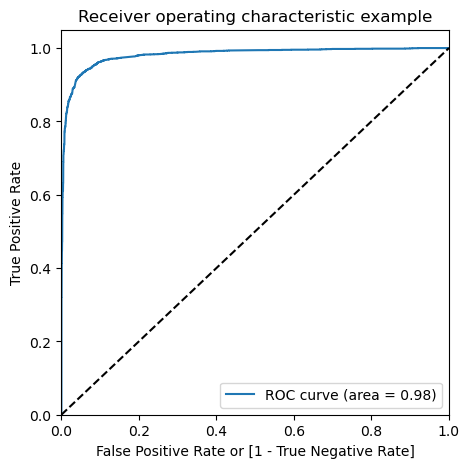

In [96]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.98 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [97]:
# Let's create columns with different probability cutoffs

numbers = [float(x) / 10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Conversion_Prob.map(
        lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.067584          0    1    0    0    0    0    0    0   
1          0         0.017297          0    1    0    0    0    0    0    0   
2          0         0.012181          0    1    0    0    0    0    0    0   
3          1         0.940864          1    1    1    1    1    1    1    1   
4          1         0.998283          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    1    1    1  
4    1    1    1

In [98]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted,
                                   y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0, 0] + cm1[1, 1]) / total1

    speci = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    sensi = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.874980  0.977105  0.811012
0.2   0.2  0.926783  0.959526  0.906274
0.3   0.3  0.934026  0.943173  0.928297
0.4   0.4  0.940324  0.927637  0.948271
0.5   0.5  0.942844  0.911693  0.962356
0.6   0.6  0.935286  0.871627  0.975160
0.7   0.7  0.932766  0.855274  0.981306
0.8   0.8  0.925051  0.828700  0.985403
0.9   0.9  0.908203  0.775552  0.991293


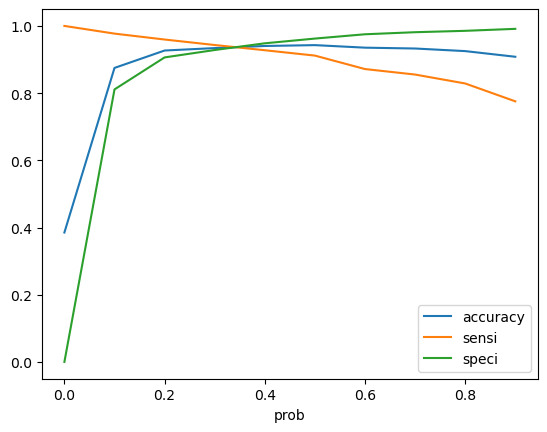

In [99]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.4, you get the optimal values of the three metrics. So let's choose 0.4 as our cutoff now.

In [100]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(
    lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.067584          0    1    0    0    0    0    0    0   
1          0         0.017297          0    1    0    0    0    0    0    0   
2          0         0.012181          0    1    0    0    0    0    0    0   
3          1         0.940864          1    1    1    1    1    1    1    1   
4          1         0.998283          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    1    1    1                1  
4    1    1    1                1

In [101]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted,
                       y_train_pred_final.final_predicted)

0.9403243583687608

In [102]:
# Let's create the confusion matrix once again

conf_matrix = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
conf_matrix



array([[3758,  147],
       [ 216, 2230]], dtype=int64)

In [103]:
# Let's evaluate the other metrics as well

TP = conf_matrix[1, 1]  # true positive
TN = conf_matrix[0, 0]  # true negatives
FP = conf_matrix[0, 1]  # false positives
FN = conf_matrix[1, 0]  # false negatives

In [104]:
# Calculate Sensitivity

TP/(TP+FN)

0.9116925592804579

In [105]:
# Calculate Specificity

TN/(TN+FP)

0.9623559539052496

This cutoff point seems good to go!

## Step 4: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [106]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit'
        ]] = scaler.transform(X_test[[
            'TotalVisits', 'Total Time Spent on Website','Page Views Per Visit'
            
        ]])

In [107]:
# Select the columns in X_train for X_test as well

X_test = X_test
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3271     0.284772                    -0.600595              0.955505   
1490     0.643547                     1.887326              1.510766   
7936    -0.432779                    -0.752879             -0.155018   
4216    -1.150329                    -0.888650             -1.265540   
3830     1.719873                    -0.587751              2.066027   

      A free copy of Mastering The Interview  \
3271                                       0   
1490                                       1   
7936                                       0   
4216                                       0   
3830                                       1   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3271                                    0                          0   
1490                                    1                          0   
7936                                    0                          0   
4216                                    0                          1   
3830                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
3271                        0                           0   
1490                        0                           1   
7936                        0                           0   
4216                        0                           0   
3830                        0                           0   

      Lead Source_Facebook  Lead Source_Google  ...  \
3271                     0                   1  ...   
1490                     0                   0  ...   
7936                     0                   1  ...   
4216                     0                   0  ...   
3830                     0                   0  ...   

      Last Notable Activity_Form Submitted on Website  \
3271                                                0   
1490                                                0   
7936                                                0   
4216                                                0   
3830                                                0   

      Last Notable Activity_Had a Phone Conversation  \
3271                                               0   
1490                                               0   
7936                                               0   
4216                                               0   
3830                                               0   

      Last Notable Activity_Modified  \
3271                               0   
1490                               0   
7936                               0   
4216                               1   
3830                               0   

      Last Notable Activity_Olark Chat Conversation  \
3271                                              0   
1490                                              0   
7936                                              0   
4216                                              0   
3830                                              0   

      Last Notable Activity_Page Visited on Website  \
3271                                              0   
1490                                              0   
7936                                              0   
4216                                              0   
3830                                              0   

      Last Notable Activity_Resubscribed to emails  \
3271                                             0   
1490                                             0   
7936                                             0   
4216                                             0   
3830                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
3271                               0                                  0   
1490                               0                                  0   
7936                

In [108]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test)

In [109]:
# Check X_test_sm

X_test_sm

const  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3271    1.0     0.284772                    -0.600595              0.955505   
1490    1.0     0.643547                     1.887326              1.510766   
7936    1.0    -0.432779                    -0.752879             -0.155018   
4216    1.0    -1.150329                    -0.888650             -1.265540   
3830    1.0     1.719873                    -0.587751              2.066027   
...     ...          ...                          ...                   ...   
850     1.0    -0.074003                     0.632357             -0.432648   
2879    1.0    -0.432779                     0.192017             -0.155018   
6501    1.0     1.719873                     1.560740              2.066027   
7155    1.0    -0.074003                     0.056246              0.400244   
376     1.0     0.284772                    -0.206123              0.955505   

      A free copy of Mastering The Interview  \
3271                                       0   
1490                                       1   
7936                                       0   
4216                                       0   
3830                                       1   
...                                      ...   
850                                        1   
2879                                       0   
6501                                       1   
7155                                       1   
376                                        0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3271                                    0                          0   
1490                                    1                          0   
7936                                    0                          0   
4216                                    0                          1   
3830                                    1                          0   
...                                   ...                        ...   
850                                     1                          0   
2879                                    1                          0   
6501                                    1                          0   
7155                                    1                          0   
376                                     1                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
3271                        0                           0   
1490                        0                           1   
7936                        0                           0   
4216                        0                           0   
3830                        0                           0   
...                       ...                         ...   
850                         0                           0   
2879                        0                           0   
6501                        0                           1   
7155                        0                           1   
376                         0                           0   

      Lead Source_Facebook  ...  \
3271                     0  ...   
1490                     0  ...   
7936                     0  ...   
4216                     0  ...   
3830                     0  ...   
...                    ...  ...   
850                      0  ...   
2879                     0  ...   
6501                     0  ...   
7155                     0  ...   
376                      0  ...   

      Last Notable Activity_Form Submitted on Website  \
3271                                                0   
1490                                                0   
7936                                                0   
4216                                                0   
3830                                                0   
...                                               ...   
850                                                 0   
2879 

In [110]:
X_test.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google',
       ...
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=114)

In [111]:
X_train.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google',
       ...
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=114)

In [112]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))


In [113]:
y_test_pred[:10]

3271    0.038789
1490    0.992770
7936    0.040146
4216    0.994059
3830    0.051340
1800    0.950013
6507    0.009789
4821    0.001761
4223    0.998402
4714    0.098997
dtype: float64

In [114]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [115]:
# Let's see the head

y_pred_1.head()

0
3271  0.038789
1490  0.992770
7936  0.040146
4216  0.994059
3830  0.051340

In [116]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [117]:
# Remove index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [118]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [119]:
# Check 'y_pred_final'

y_pred_final.head()

Converted         0
0          0  0.038789
1          1  0.992770
2          0  0.040146
3          1  0.994059
4          0  0.051340

In [120]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [121]:
# Let's see the head of y_pred_final

y_pred_final.head()

Converted  Conversion_Prob
0          0         0.038789
1          1         0.992770
2          0         0.040146
3          1         0.994059
4          0         0.051340

In [122]:
# Make predictions on the test set using 0.38 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(
    lambda x: 1 if x > 0.4 else 0)

In [123]:
# Check y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          0         0.038789                0
1          1         0.992770                1
2          0         0.040146                0
3          1         0.994059                1
4          0         0.051340                0

In [124]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.9261843554902681

In [125]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'],
                                      y_pred_final.final_predicted)
confusion2

array([[1621,  113],
       [  88,  901]], dtype=int64)

In [126]:
TP = confusion2[1, 1]  # true positive
TN = confusion2[0, 0]  # true negatives
FP = confusion2[0, 1]  # false positives
FN = confusion2[1, 0]  # false negatives

In [127]:
# Calculate sensitivity
TP / float(TP+FN)

0.9110212335692619

In [128]:
# Calculate specificity
TN / float(TN+FP)

0.9348327566320646

## Precision-Recall View

Let's now also build the training model using the precision-recall view

In [129]:
#Looking at the confusion matrix again

In [130]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,
                                     y_train_pred_final.Predicted)
confusion

array([[3758,  147],
       [ 216, 2230]], dtype=int64)

In [131]:
##### Precision
TP / TP + FP

114.0

In [132]:
confusion[1, 1] / (confusion[0, 1] + confusion[1, 1])

0.9381573411863694

In [133]:
##### Recall
TP / TP + FN

89.0

In [134]:
confusion[1, 1] / (confusion[1, 0] + confusion[1, 1])

0.9116925592804579

### Precision and recall tradeoff

In [135]:
from sklearn.metrics import precision_recall_curve

In [136]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [137]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted,
                                          y_train_pred_final.Conversion_Prob)

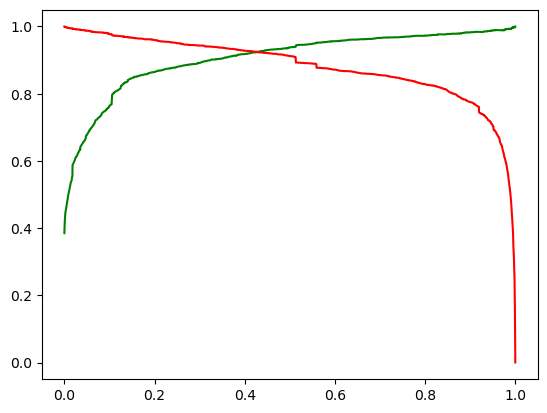

In [138]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [139]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(
    lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head(10)

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.067584          0    1    0    0    0    0    0    0   
1          0         0.017297          0    1    0    0    0    0    0    0   
2          0         0.012181          0    1    0    0    0    0    0    0   
3          1         0.940864          1    1    1    1    1    1    1    1   
4          1         0.998283          1    1    1    1    1    1    1    1   
5          1         0.998252          1    1    1    1    1    1    1    1   
6          0         0.034878          0    1    0    0    0    0    0    0   
7          1         0.952640          1    1    1    1    1    1    1    1   
8          1         0.994754          1    1    1    1    1    1    1    1   
9          0         0.008052          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    1    1    1                1  
4    1    1    1                1  
5    1    1    1                1  
6    0    0    0                0  
7    1    1    1                1  
8    1    1    1                1  
9    0    0    0                0

In [140]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted,
                       y_train_pred_final.final_predicted)

0.9403243583687608

In [141]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted,
                                      y_train_pred_final.final_predicted)
confusion2

array([[3703,  202],
       [ 177, 2269]], dtype=int64)

In [142]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [143]:
# Calculate Precision

TP/(TP+FP)

0.9182517199514366

In [144]:
# Calculate Recall

TP/(TP+FN)

0.9276369582992641

 Precision around 91% and Recall around 93%

In [145]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [146]:
y_test_pred[:10]

3271    0.038789
1490    0.992770
7936    0.040146
4216    0.994059
3830    0.051340
1800    0.950013
6507    0.009789
4821    0.001761
4223    0.998402
4714    0.098997
dtype: float64

In [147]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [148]:
# Let's see the head

y_pred_1.head()

0
3271  0.038789
1490  0.992770
7936  0.040146
4216  0.994059
3830  0.051340

In [149]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [150]:
# Remove index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [151]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [152]:
# Check 'y_pred_final'

y_pred_final.head()

Converted         0
0          0  0.038789
1          1  0.992770
2          0  0.040146
3          1  0.994059
4          0  0.051340

In [153]:
# Rename the column

y_pred_final = y_pred_final.rename(columns={0: 'Conversion_Prob'})

In [154]:
# Let's see the head of y_pred_final

y_pred_final.head()

Converted  Conversion_Prob
0          0         0.038789
1          1         0.992770
2          0         0.040146
3          1         0.994059
4          0         0.051340

In [155]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(
    lambda x: 1 if x > 0.4 else 0)

In [156]:
# Check y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          0         0.038789                0
1          1         0.992770                1
2          0         0.040146                0
3          1         0.994059                1
4          0         0.051340                0

In [157]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.9261843554902681

In [158]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1621,  113],
       [  88,  901]], dtype=int64)

In [159]:
TP = confusion2[1, 1]  # true positive
TN = confusion2[0, 0]  # true negatives
FP = confusion2[0, 1]  # false positives
FN = confusion2[1, 0]  # false negatives


In [160]:
# Calculate sensitivity
TP / float(TP+FN)

0.9110212335692619

In [161]:
# Calculate specificity
TN / float(TN+FP)

0.9348327566320646

In [162]:
# Calculate Precision

TP/(TP+FP)

0.888560157790927

In [163]:
# Calculate Recall

TP/(TP+FN)

0.9110212335692619

With the current cut off as 0.4 we have Precision around 89% and Recall around 91%

# Conclusion

* Overall Accuracy - 0.925 (93% of them are correctly classified) 
* Precision 89% ( 89% of the predicted positives are correct)
* Recall 91% (91% of the actual positives are correctly predicted)
* Sensitivity 91% and Specificity 93%.
* Major lead source  is google 
* Best targets are unemployed and working professionals
* Most leads are from SMS

